# Load and analyze data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,district_area,road_distance_1,road_distance_2,year_of_construction,bulvar_ring_km,bus_station_distance,cafe_count,fitness_center_distance,floor,district_population,...,product_type,public_transport_station_distance,sadovoe_km,base_school_distance,sport_count,state,district_name,timestamp,malls_count,railway_station_distance
0,6.407578e+06,1.422391,3.830951,NaN,13.675657,24.292406,152,0.485841,4.0,86206,...,Investment,3.299822,13.100618,0.177975,52,NaN,Bibirevo,2011-08-20,52,14.231961
1,9.589337e+06,2.887377,3.103996,NaN,8.132640,5.706113,177,0.668364,3.0,76284,...,Investment,0.783160,6.444333,0.273345,66,NaN,Nagatinskij Zaton,2011-08-23,40,9.242586
2,4.808270e+06,0.647250,2.927487,NaN,8.054252,6.710302,122,0.733101,2.0,101982,...,Investment,3.945073,6.963403,0.158072,67,NaN,Tekstil'shhiki,2011-08-27,35,9.540544
3,1.258354e+07,2.677824,2.780449,NaN,18.309433,6.734618,61,0.623484,9.0,21155,...,Investment,1.579164,17.457198,0.236455,26,NaN,Mitino,2011-09-01,22,17.478380
4,8.398461e+06,1.721834,3.133531,NaN,0.787593,1.423428,2283,0.220288,4.0,28179,...,Investment,0.857764,0.046810,0.376838,195,NaN,Basmannoe,2011-09-05,114,1.595898


In [3]:
train_df.drop('id', inplace=True, axis=1)

In [4]:
column_types = {}
target = 'result_price'
num_features = []
cat_features = []

## Target

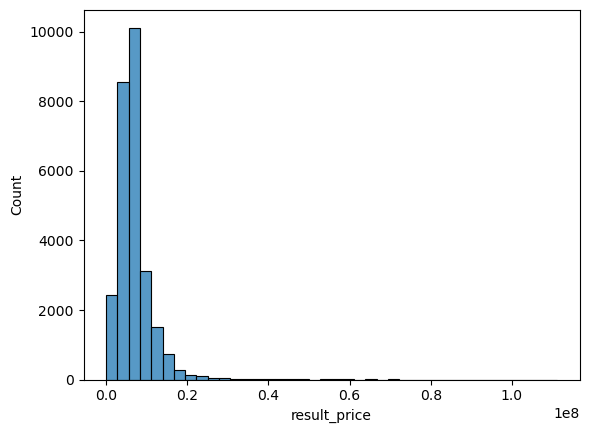

In [5]:
sns.histplot(
    data=train_df,
    x=target,
    bins=40
)
plt.show()

In [6]:
len(train_df)

27232

In [7]:
train_df = train_df[train_df[target] < train_df[target].quantile(0.995)]

In [8]:
# train_df = train_df[train_df[target] != 1e6]
# train_df = train_df[train_df[target] != 2e6]

In [9]:
train_df['product_type'].unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

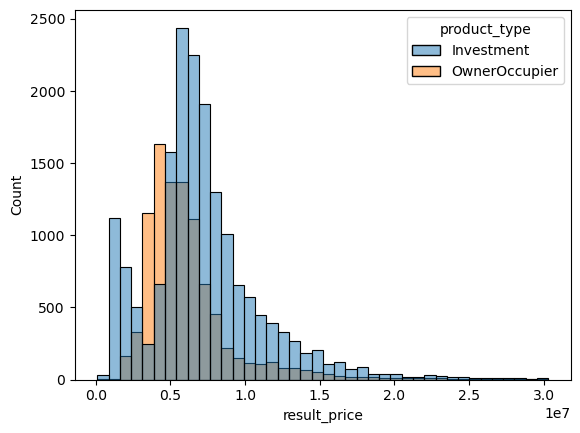

In [10]:
sns.histplot(
    data=train_df,
    x=target,
    bins=40,
    hue='product_type'
)

# for i in [1, 2, 3, 4]:
#     plt.axvline(i * 1e6, color='red')

plt.show()

## District

In [11]:
column_types['district'] = [
    'district_population', 
    'district_name', 
    'district_area',
]

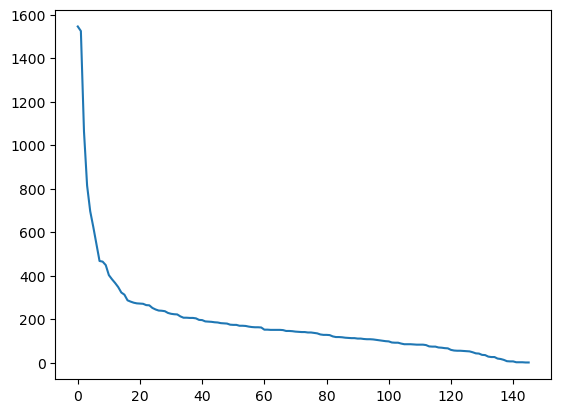

In [12]:
tmp = train_df['district_name'].value_counts().to_frame().reset_index()
plt.plot(tmp.index, tmp['district_name'])
plt.show()

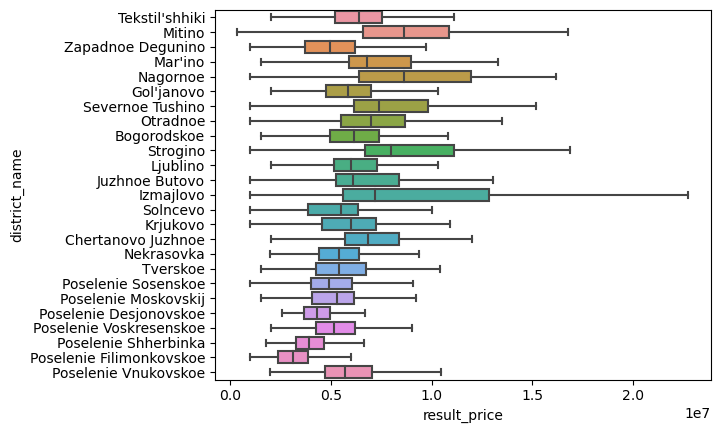

In [13]:
most_popular_districts = train_df['district_name'].value_counts().index[:25]

sns.boxplot(
    data=train_df[train_df['district_name'].isin(most_popular_districts)], 
    x=target, 
    y='district_name', 
    showfliers=False
)
plt.show()

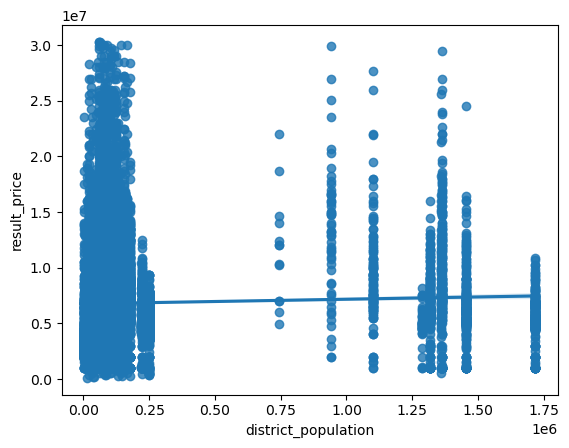

In [14]:
sns.regplot(
    data=train_df,
    x='district_population',
    y=target,
    # hue='district_name'
)
plt.show()

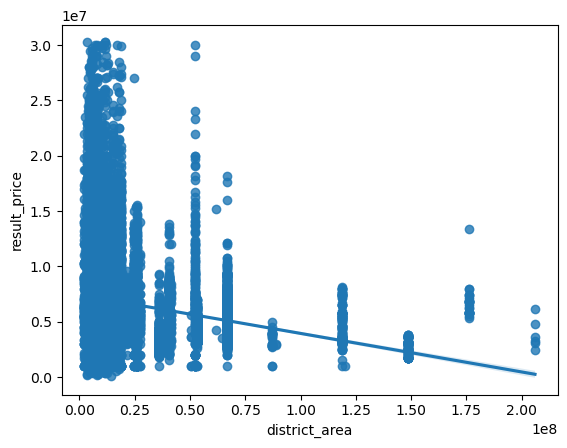

In [15]:
sns.regplot(
    data=train_df,
    x='district_area',
    y=target,
    # hue='district_name'
)
plt.show()

### Feature engineering

In [16]:
train_df['district_density'] = train_df['district_area'] / train_df['district_population']
column_types['district'] += ['district_density']

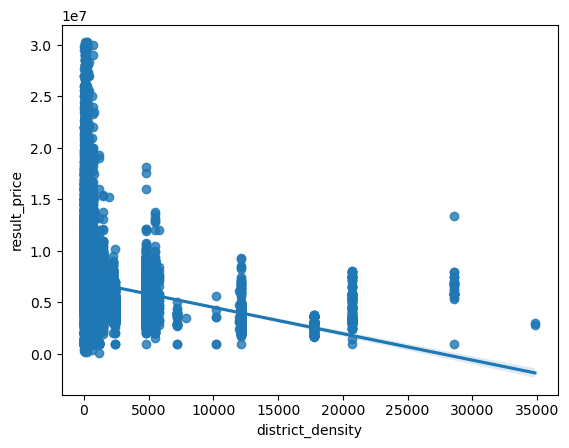

In [17]:
sns.regplot(
    data=train_df,
    x='district_density',
    y=target,
)
plt.show()

In [18]:
cat_features += ['district_name']
num_features += ['district_area', 'district_density']

## Date

In [19]:
column_types['dates'] = ['timestamp']

### Feature engineering

In [20]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month.astype(str)
train_df['year_month'] = train_df['year'].astype(str) + '_' +  train_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < train_df['timestamp'].min()
train_df['days_since'] = (train_df['timestamp'] - min_date).dt.days

column_types['dates'] += ['year', 'month', 'days_since']

### Analysis

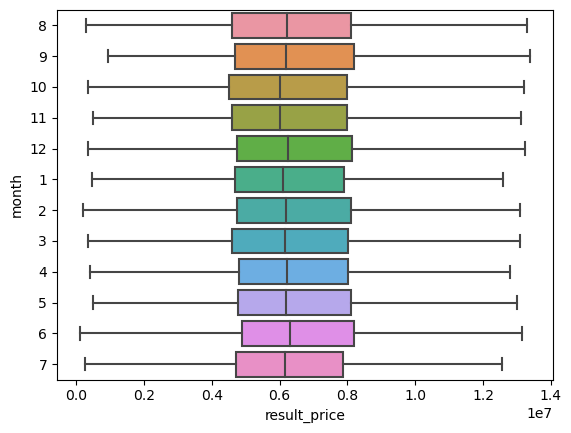

In [21]:
sns.boxplot(
    data=train_df,
    x=target,
    y='month',
    # hue='month',
    showfliers=False,
    # hue_order=map(str, range(1, 13))
)

plt.show()

In [22]:
cat_features += ['month']

In [23]:
num_features += ['days_since', 'year']

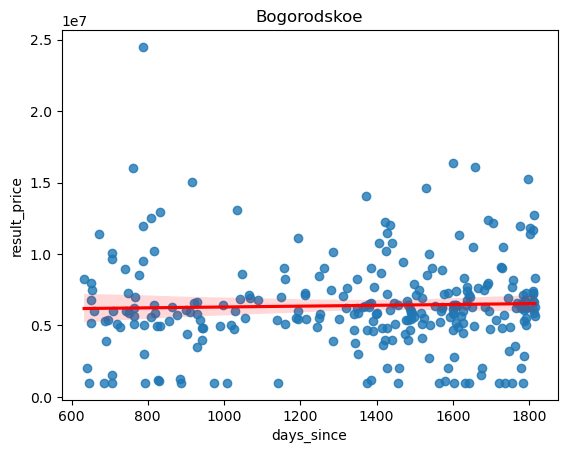

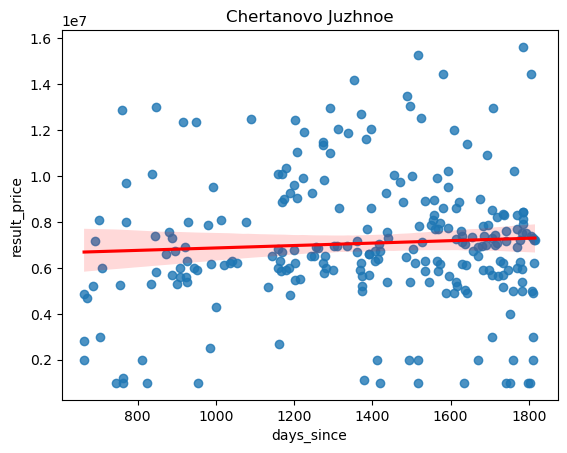

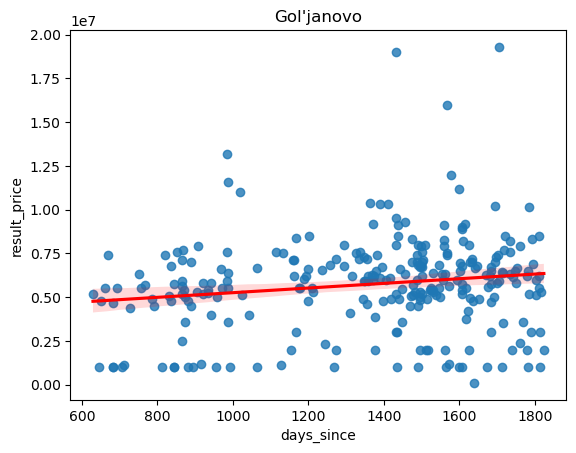

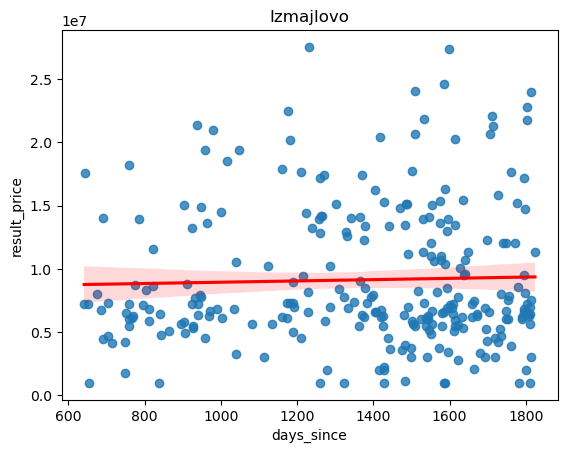

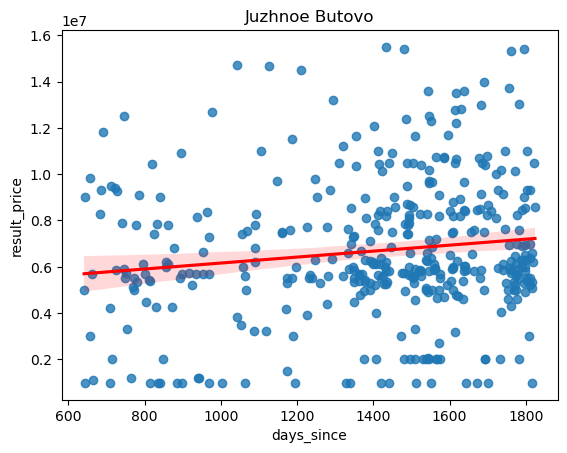

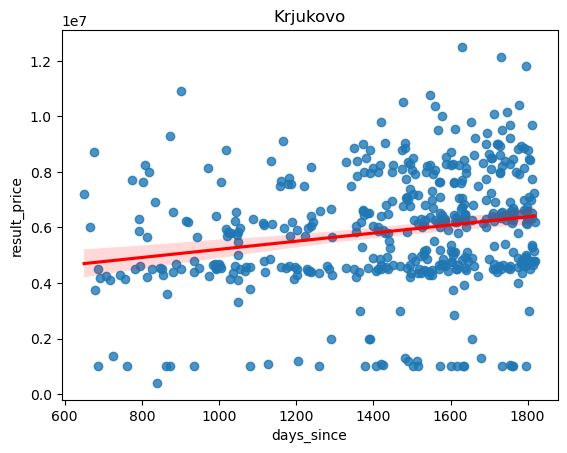

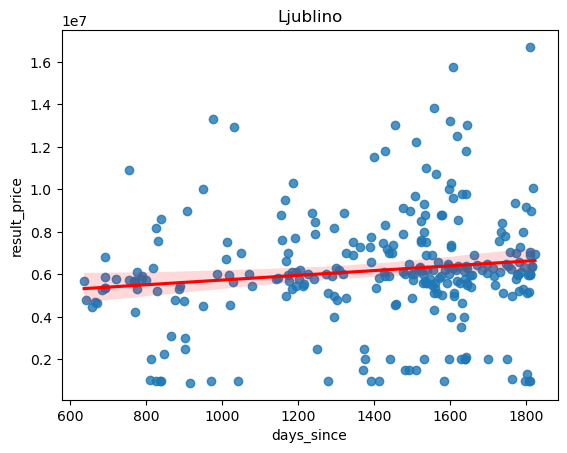

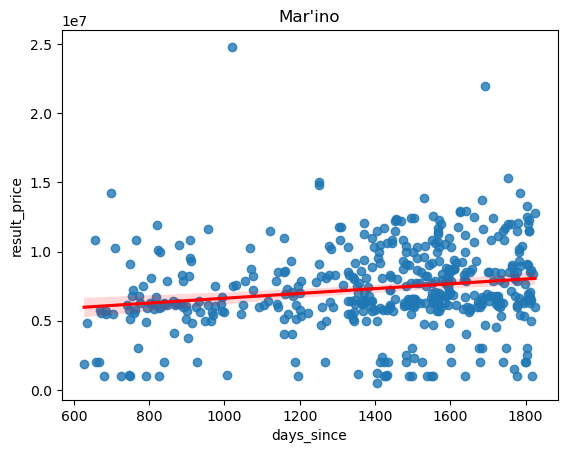

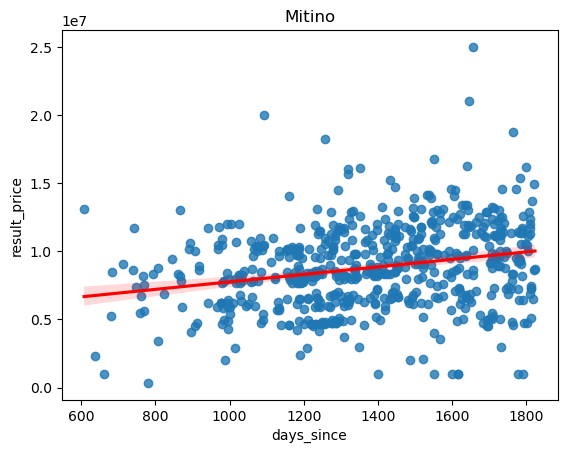

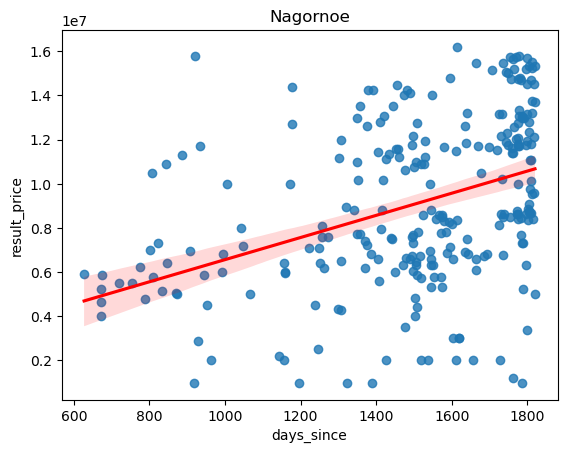

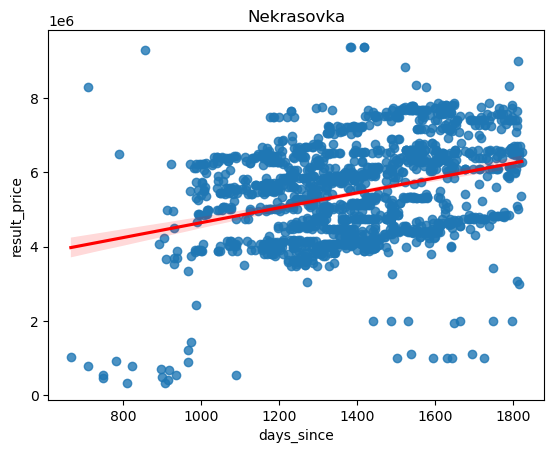

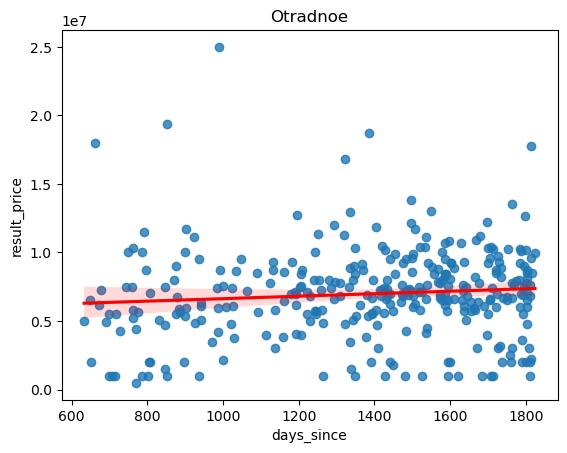

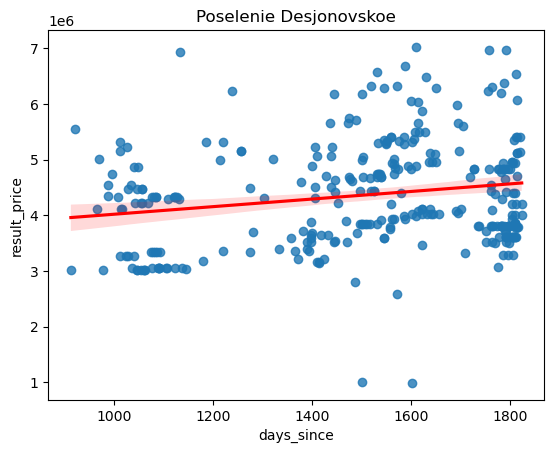

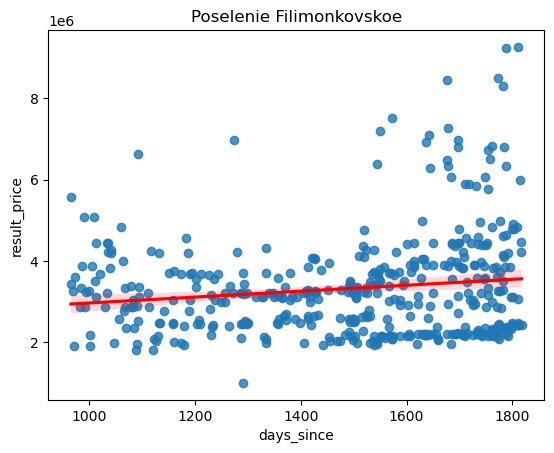

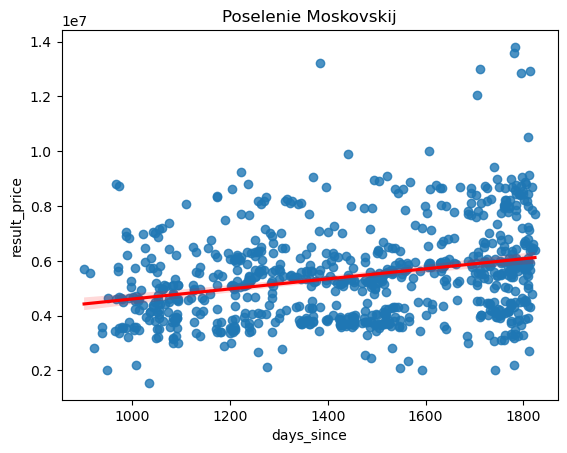

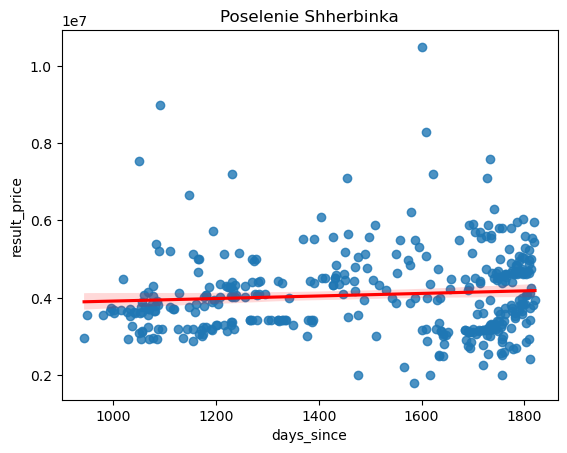

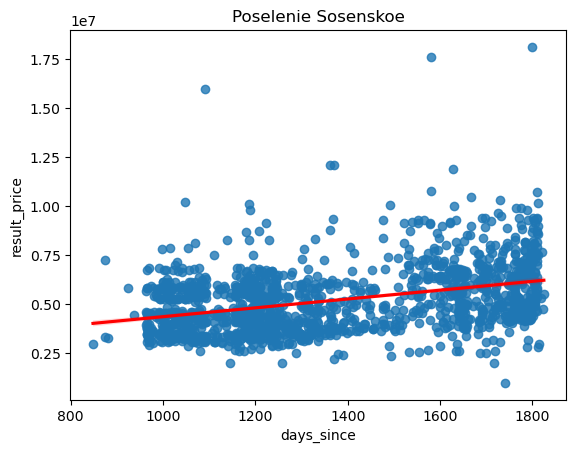

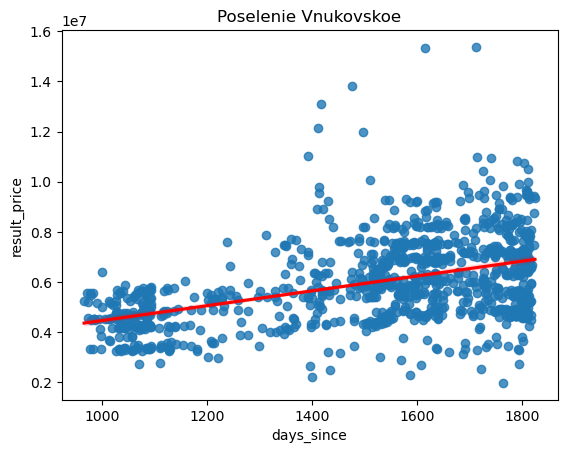

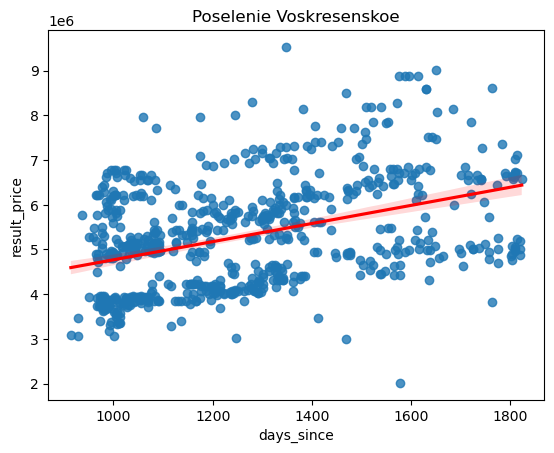

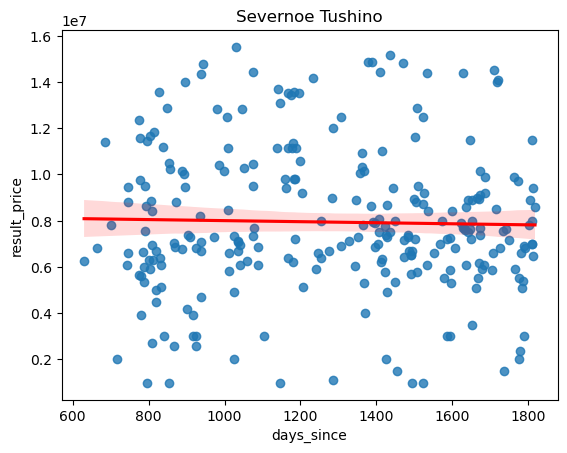

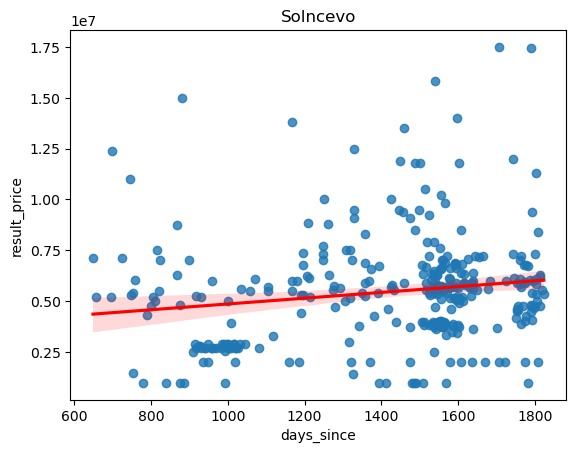

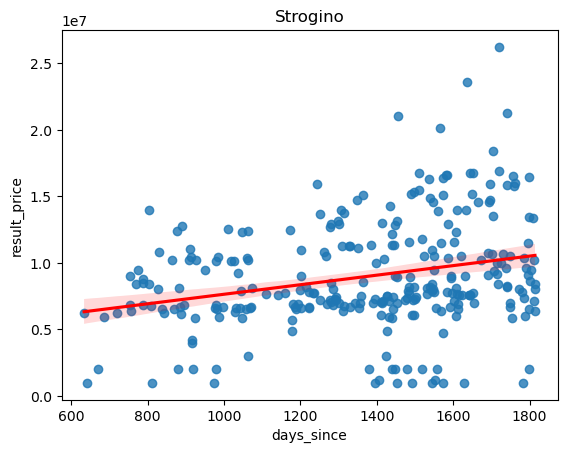

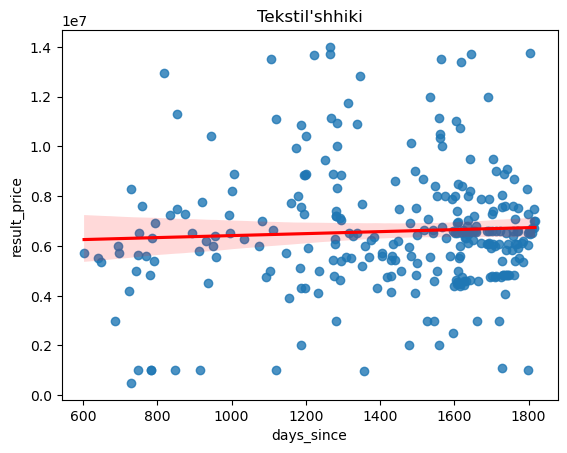

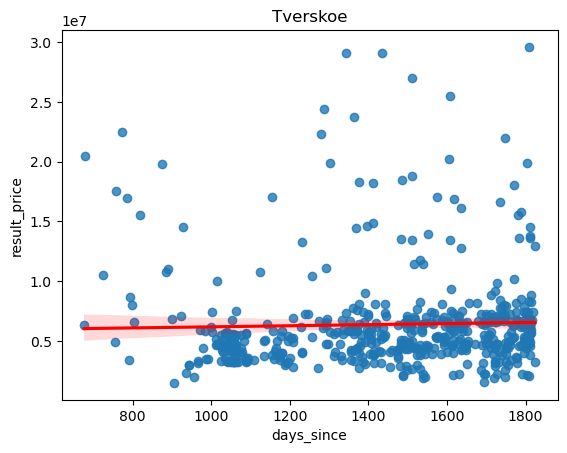

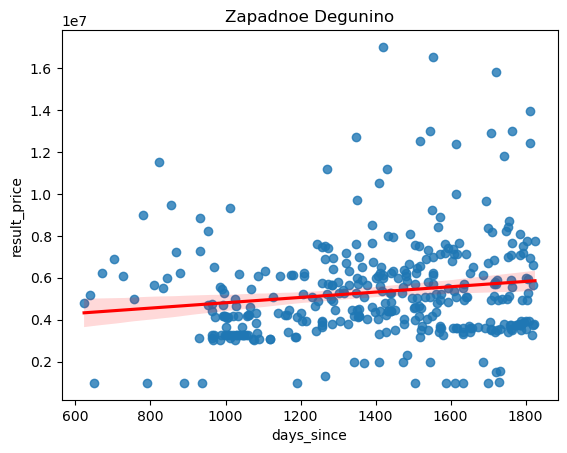

In [24]:
for district_name, df in train_df.groupby('district_name'):
    if district_name not in most_popular_districts:
        continue

    plt.title(district_name)
    sns.regplot(
        data=df,
        x='days_since',
        y=target,
        line_kws={'color': "red"}
    )

    plt.show()

## Neighbourhood

In [25]:
column_types['neighbourhood'] = [
    'cafe_count',
    'base_school_distance',
    'road_distance_1',
    'road_distance_2',
    'bulvar_ring_km',
    'bus_station_distance',
    'fitness_center_distance',
    'green_part',
    'green_zone_distance',
    'healthcare_centers_count',
    'kremlin_distance',
    'leisure_count',
    'market_count',
    'metro_minutes',
    'mkad_distance',
    'office_count',
    'park_distance',
    'public_transport_station_distance',
    'sadovoe_km',
    'sport_count',
    'malls_count',
    'railway_station_distance',
]

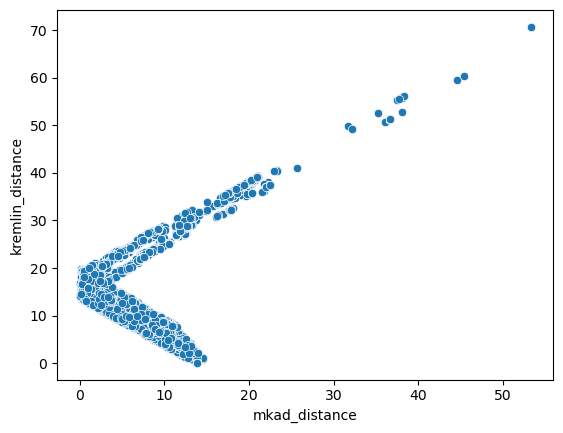

In [26]:
sns.scatterplot(
    data=train_df,
    x='mkad_distance',
    y='kremlin_distance',
)
plt.show()

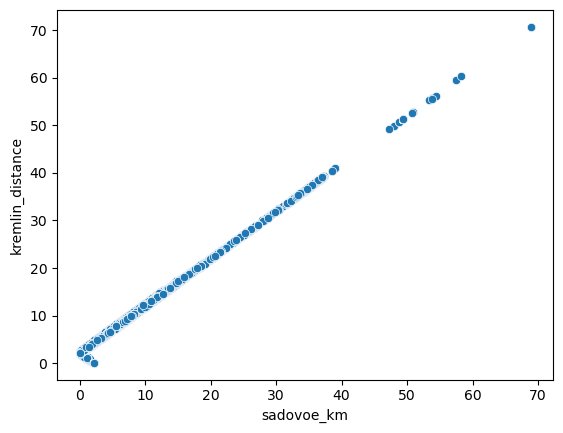

In [27]:
sns.scatterplot(
    data=train_df,
    x='sadovoe_km',
    y='kremlin_distance',
)
plt.show()

### Feature engineering

In [28]:
train_df['mkad_distance_linaer'] = train_df['mkad_distance']
train_df['sadovoe_km_linear'] = train_df['sadovoe_km']

train_df.loc[train_df['kremlin_distance'] < 18, 'mkad_distance_linaer'] *= -1
train_df.loc[train_df['kremlin_distance'] < 2.5, 'sadovoe_km_linear'] *= -1

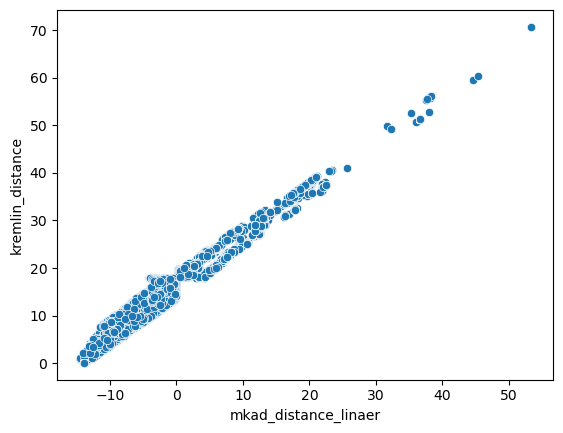

In [29]:
sns.scatterplot(
    data=train_df,
    x='mkad_distance_linaer',
    y='kremlin_distance',
)
plt.show()

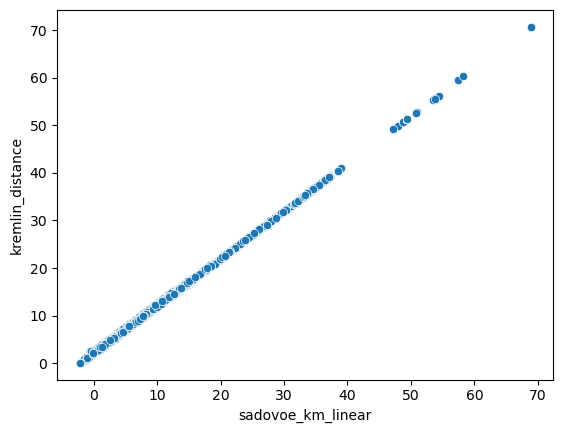

In [30]:
sns.scatterplot(
    data=train_df,
    x='sadovoe_km_linear',
    y='kremlin_distance',
)
plt.show()

In [31]:
column_types['neighbourhood'] += ['mkad_distance_linaer', 'sadovoe_km_linear']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
neighbourhood_scaler = StandardScaler()
train_df.loc[:, column_types['neighbourhood']] = neighbourhood_scaler.fit_transform(train_df[column_types['neighbourhood']])

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
neighbourhood_imputer = SimpleImputer(strategy='median')
train_df.loc[:, column_types['neighbourhood']] = neighbourhood_imputer.fit_transform(train_df[column_types['neighbourhood']])

In [36]:
from sklearn.decomposition import PCA

In [37]:
neighbourhood_pca = PCA()
n = len(column_types['neighbourhood'])
train_df.loc[:, [f'neighbourhood_pca_{i + 1}' for i in range(n)]] = neighbourhood_pca.fit_transform(train_df[column_types['neighbourhood']])

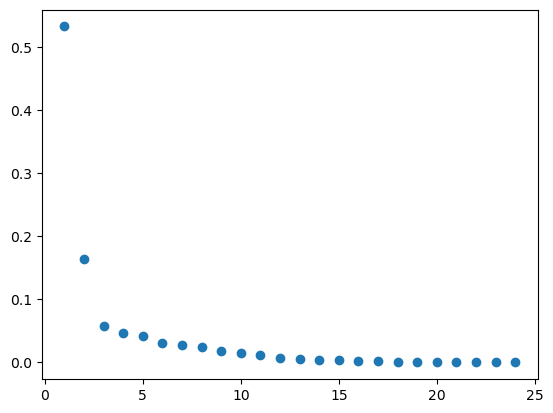

In [38]:
plt.scatter(range(1, 1 + n), neighbourhood_pca.explained_variance_ratio_)
plt.show()

In [39]:
neighbourhood_pca_columns = [f'neighbourhood_pca_{i + 1}' for i in range(n)] 
num_features += neighbourhood_pca_columns

In [40]:
# num_features += column_types['neighbourhood']

## Flat

In [41]:
column_types['flat'] = [
    'total_area',
    'living_area',
    'kitchen_area',
    'floor',
    'floors_num',
    'wall_material',
    'rooms_num',
    'product_type',
    'year_of_construction',
    'state',
]

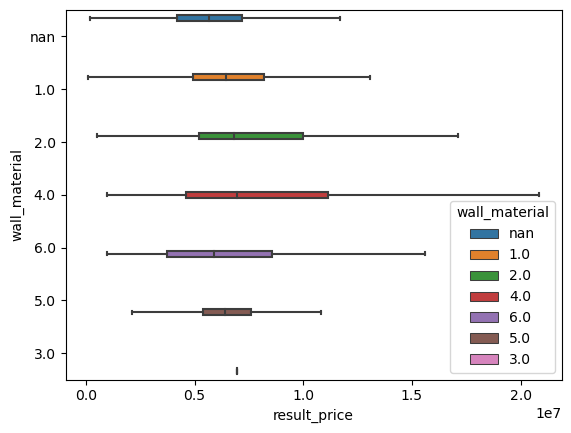

In [42]:
sns.boxplot(
    x=train_df[target],
    y=train_df['wall_material'].astype(str),
    hue=train_df['wall_material'].astype(str),
    showfliers=False    
)
plt.show()

In [43]:
train_df['wall_material'].astype(pd.Int64Dtype()).value_counts()

1    11980
2     2555
5     1380
4     1033
6      613
3        1
Name: wall_material, dtype: Int64

### Feature engineering

In [44]:
train_df['wall_material'] = train_df['wall_material'].astype(pd.Int64Dtype())
train_df.loc[train_df['wall_material'] == 3, 'wall_material'] = None
wall_imputer = SimpleImputer(strategy='most_frequent')

train_df.loc[:, ['wall_material']] = wall_imputer.fit_transform(train_df[['wall_material']]).astype(str)

/home/denis/miniconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/tmp/ipykernel_5238/70713644.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, ['wall_material']] = wall_imputer.fit_transform(train_df[['wall_material']]).astype(str)


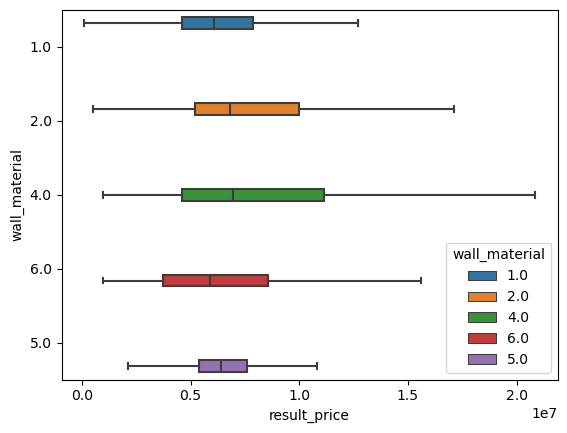

In [45]:
sns.boxplot(
    x=train_df[target],
    y=train_df['wall_material'].astype(str),
    hue=train_df['wall_material'].astype(str),
    showfliers=False
)
plt.show()

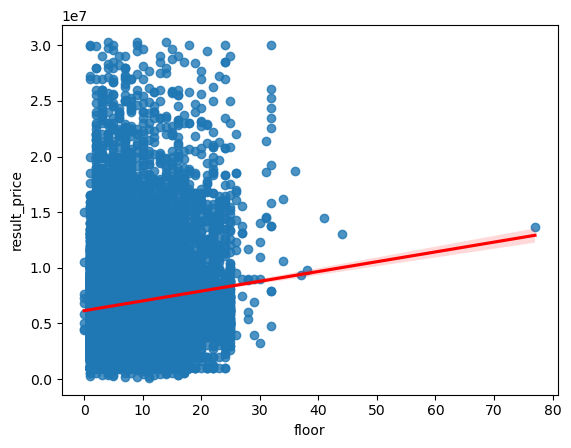

In [46]:
sns.regplot(
    data=train_df,
    x='floor',
    y=target,
    line_kws={'color': 'red'}
)
plt.show()

/home/denis/miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/denis/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


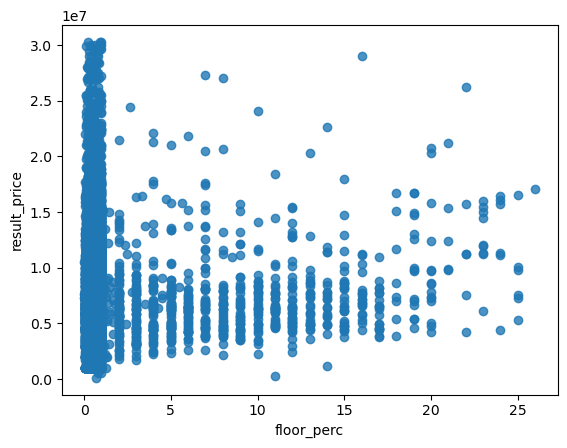

In [47]:
train_df['floor_perc'] = train_df['floor'] / train_df['floors_num']
sns.regplot(
    data=train_df,
    x='floor_perc',
    y=target,
    line_kws={'color': 'red'}
)
plt.show()

# column_types['flat'] += ['floor_perc']

In [48]:
column_types['flat']

['total_area',
 'living_area',
 'kitchen_area',
 'floor',
 'floors_num',
 'wall_material',
 'rooms_num',
 'product_type',
 'year_of_construction',
 'state']

In [49]:
train_df['rooms_num'] = train_df['rooms_num'].astype(str)

In [50]:
cat_features += ['wall_material', 'product_type', 'rooms_num']

num_features += [
    'total_area',
    'living_area',
    'kitchen_area',
    'floor',
    # 'floors_num',
    'year_of_construction',
    'state',
    # 'floor_perc'
]

# Feature engineering

In [51]:
train_df['prev_year'] = train_df['year'] - 1
train_df['square_price'] = train_df[target] / train_df['total_area']

train_df = train_df.merge(
    train_df.groupby('year')[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: f'median_prev_year'}),
    on='prev_year',
    how='left'
)

train_df = train_df.merge(
    train_df.groupby(['year', 'district_name'])[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: 'median_prev_year_district'}),
    on=['prev_year', 'district_name'],
    how='left'
)

In [52]:
train_df['estimate_prev_year'] = train_df['median_prev_year'] * train_df['total_area']
train_df['estimate_prev_year_district'] = train_df['median_prev_year_district'] * train_df['total_area']

column_types['prev_year'] = ['estimate_prev_year', 'estimate_prev_year_district']
num_features += ['estimate_prev_year', 'estimate_prev_year_district']

In [53]:
# # ToDo: Remove target leakage
# train_df['square_price'] = (train_df[target] / train_df['total_area'])
# district_median_price = train_df.groupby('district_name')['square_price'].median()\
#     .reset_index().rename(columns={'square_price': 'median_district_square_price'})

In [54]:
# train_df = train_df.merge(district_median_price, on='district_name')
# train_df['median_district_price'] = train_df['total_area'] * train_df['median_district_square_price']
# # train_df['district_residual'] = train_df[target] / train_df['median_district_price']

In [55]:
# column_types['extended'] = ['median_district_price']
# num_features += ['median_district_price']

In [56]:
# from sklearn.linear_model import Ridge
# from itertools import chain

In [57]:
# neighbourhood_model = Ridge()
# columns = set(column_types['neighbourhood']) - set(cat_features)
# neighbourhood_model.fit(train_df[columns], train_df[target])
# train_df['neighbourhood_price'] = neighbourhood_model.predict(train_df[columns])

In [58]:
# flat_model = Ridge()
# columns = set(column_types['flat']) - set(cat_features)
# flat_model.fit(train_df[columns], train_df[target])
# train_df['flat_price'] = flat_model.predict(train_df[columns])

In [59]:
# column_types['extended'] += ['neighbourhood_price', 'flat_price']

# Train test split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_df = train_df[train_df['year'] != 2011]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df[num_features + cat_features], 
    train_df[target], 
    test_size=0.7,
    random_state=42
)

# Make model

In [63]:
import catboost as cb
import lightgbm
import optuna
from functools import partial
from sklearn.metrics import mean_squared_log_error
import numpy as np

In [ ]:
params = {
    'iterations': 828, 
    'learning_rate': 0.9718293566572332, 
    'depth': 8,
    'task_type': 'GPU',
    'devices': '0:1',
    'cat_features': cat_features,
    'use_best_model': True,
    'loss_function': 'RMSE'
}

gbm = cb.CatBoostRegressor(**params)
gbm.fit(
    X_train,
    np.log(y_train + 1),
    eval_set=[(X_test, np.log(y_test + 1))],
    verbose=False,
)

In [ ]:
y_pred = np.exp(gbm.predict(X_test)) - 1

In [ ]:
mean_squared_log_error(y_test, y_pred)

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    param = {
        'iterations': trial.suggest_int('iterations', 800, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1),
        'depth': trial.suggest_int('depth', 4, 10),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 100000),
        # 'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
        'use_best_model': True,
        'loss_function': 'RMSE'
    }

    num_neighbourhood_features = 15
    columns = [
        c for c in X_test.columns 
        if not (c.startswith('neighbourhood_pca') and int(c.split('_')[-1]) >= num_neighbourhood_features) 
    ]

    X_test = X_test[columns]
    X_train = X_train[columns]

    gbm = cb.CatBoostRegressor(**param)
    gbm.fit(
        X_train,
        np.log(y_train + 1),
        eval_set=[(X_test, np.log(y_test + 1))],
        verbose=False,
    )

    y_pred = np.exp(gbm.predict(X_test)) - 1
    return mean_squared_log_error(y_test, y_pred)

In [ ]:
objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [ ]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='minimize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=70,
    timeout=None,
)

In [ ]:
import dill
dill.load_session('catboost_optuned.db')

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
study.best_params

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    param = {
        'iterations': trial.suggest_int('iterations', 800, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'depth': trial.suggest_int('depth', 4, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 100000),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
        'use_best_model': True,
        'loss_function': 'RMSE'
    }

    num_neighbourhood_features = trial.suggest_int('num_neighbourhood_features', 1, 24)
    columns = [
        c for c in X_test.columns 
        if not (c.startswith('neighbourhood_pca') and int(c.split('_')[-1]) >= num_neighbourhood_features) 
    ]

    X_test = X_test[columns]
    X_train = X_train[columns]

    gbm = cb.CatBoostRegressor(**param)
    gbm.fit(
        X_train,
        np.log(y_train + 1),
        eval_set=[(X_test, np.log(y_test + 1))],
        verbose=False,
    )

    y_pred = np.exp(gbm.predict(X_test)) - 1
    return mean_squared_log_error(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [ ]:
study.optimize(
    func=objective_catboost, 
    n_trials=50,
    timeout=None,
)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    param = {
        'iterations': trial.suggest_int('iterations', 800, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'depth': trial.suggest_int('depth', 5, 12),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 1e4, log=True),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
        'use_best_model': True,
        'loss_function': 'RMSE'
    }

    num_neighbourhood_features = trial.suggest_int('num_neighbourhood_features', 1, 24)
    columns = [
        c for c in X_test.columns 
        if not (c.startswith('neighbourhood_pca') and int(c.split('_')[-1]) >= num_neighbourhood_features) 
    ]

    X_test = X_test[columns]
    X_train = X_train[columns]

    gbm = cb.CatBoostRegressor(**param)
    gbm.fit(
        X_train,
        np.log(y_train + 1),
        eval_set=[(X_test, np.log(y_test + 1))],
        verbose=False,
    )

    y_pred = np.exp(gbm.predict(X_test)) - 1
    return mean_squared_log_error(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [ ]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='minimize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=50,
    timeout=None,
)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
study.best_params

In [ ]:
import dill
dill.dump_session('catboost_optuned_2.db')

In [ ]:
import dill
dill.load_session('catboost_optuned_2.db')

# Predict

## Feature engineering

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df['district_density'] = test_df['district_area'] / test_df['district_population']

In [ ]:
test_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month.astype(str)
test_df['year_month'] = test_df['year'].astype(str) + '_' +  test_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < test_df['timestamp'].min()
test_df['days_since'] = (test_df['timestamp'] - min_date).dt.days

In [ ]:

test_df['mkad_distance_linaer'] = test_df['mkad_distance']
test_df['sadovoe_km_linear'] = test_df['sadovoe_km']

test_df.loc[test_df['kremlin_distance'] < 18, 'mkad_distance_linaer'] *= -1
test_df.loc[test_df['kremlin_distance'] < 2.5, 'sadovoe_km_linear'] *= -1

In [ ]:

test_df.loc[:, column_types['neighbourhood']] = neighbourhood_scaler.transform(test_df[column_types['neighbourhood']])
test_df.loc[:, column_types['neighbourhood']] = neighbourhood_imputer.transform(test_df[column_types['neighbourhood']])

n = len(column_types['neighbourhood'])
test_df.loc[:, [f'neighbourhood_pca_{i + 1}' for i in range(n)]] = neighbourhood_pca.transform(test_df[column_types['neighbourhood']])

In [ ]:

test_df['wall_material'] = test_df['wall_material'].astype(pd.Int64Dtype())
test_df.loc[test_df['wall_material'] == 3, 'wall_material'] = None

test_df.loc[:, ['wall_material']] = wall_imputer.transform(test_df[['wall_material']]).astype(str)

In [ ]:
test_df['rooms_num'] = test_df['rooms_num'].astype(str)

In [ ]:
test_df['prev_year'] = test_df['year'] - 1

test_df = test_df.merge(
    train_df.groupby('year')[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: f'median_prev_year'}),
    on='prev_year',
    how='left'
)

test_df = test_df.merge(
    train_df.groupby(['year', 'district_name'])[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: 'median_prev_year_district'}),
    on=['prev_year', 'district_name'],
    how='left'
)

In [ ]:
test_df['estimate_prev_year'] = test_df['median_prev_year'] * test_df['total_area']
test_df['estimate_prev_year_district'] = test_df['median_prev_year_district'] * test_df['total_area']


In [ ]:
my_params = {
    'iterations': 1113, 
    'learning_rate': 0.03360038128246222, 
    'depth': 10, 
    'num_neighbourhood_features': 15,
    'cat_features': cat_features, 
}


In [ ]:
num_neighbourhood_features = my_params['num_neighbourhood_features']
my_params.pop('num_neighbourhood_features', None)

columns = [
    c for c in num_features + cat_features 
    if not (c.startswith('neighbourhood_pca') and int(c.split('_')[-1]) >= num_neighbourhood_features) 
]

train = train_df[columns]
model = cb.CatBoostRegressor(**my_params)
model.fit(
    train,
    np.log(train_df[target] + 1),
    verbose=False
)

In [ ]:
y_pred = np.exp(model.predict(test_df[columns])) - 1

In [ ]:
test_df[target] = y_pred
test_df[['id', target]].to_csv('sub3.csv', index=None)

In [ ]:
params = {
    'iterations': 3000,
    'learning_rate': 0.01,
    'depth': 10,
    'l2_leaf_reg': 0.5,
    'task_type': 'GPU',
    'devices': '0:1',
    'cat_features': cat_features,
    'loss_function': 'RMSE'
}

model = cb.CatBoostRegressor(**params)
model.fit(
    train_df[num_features + cat_features],
    train_df[target],
    verbose=False,
)

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

In [ ]:
test_df['district_density'] = test_df['district_area'] / test_df['district_population']
test_df.loc[:, column_types['neighbourhood']] = neighbourhood_scaler.transform(test_df[column_types['neighbourhood']])
test_df.loc[:, column_types['neighbourhood']] = neighbourhood_imputer.transform(test_df[column_types['neighbourhood']])
test_df.loc[:, [f'neighbourhood_pca_{i + 1}' for i in range(n)]] = neighbourhood_pca.transform(test_df[column_types['neighbourhood']])

In [ ]:
test_df.loc[:] = simple_imputer.transform(test_df)
test_df['wall_material'] = test_df['wall_material'].astype(str)

In [ ]:
test_df = test_df.merge(district_median_price, on='district_name')
test_df['median_district_price'] = test_df['total_area'] * test_df['median_district_square_price']

In [ ]:
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['year_month'] = test_df['year'].astype(str) + '_' +  test_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < train_df['timestamp'].min()
test_df['days_since'] = (test_df['timestamp'] - min_date).dt.days


In [ ]:
test_df[target] = model.predict(test_df[num_features + cat_features])

In [ ]:
test_df[['id', target]].to_csv('sub2.csv', index=None)